# Tutorial 9
## Introduction to Neural Networks

<img src="https://upload.wikimedia.org/wikipedia/commons/4/46/Colored_neural_network.svg" height="200" width="200">

In [11]:
import numpy as np
from sklearn.datasets import fetch_mldata
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [12]:
%pylab inline
# Fetch the MNIST handwritten digit dataset
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original', data_home="../data")

Populating the interactive namespace from numpy and matplotlib


In [13]:
def train_and_test(model, xtrain, ytrain, xtest, ytest):
    model = model.fit(xtrain, ytrain)
    output = model.predict(xtest)
    print (1.0 * sum([i==j for (i, j) in zip(output, ytest)])) / len(ytest)

In [14]:
x = mnist.data
y = mnist.target
xy = np.c_[x,y]
np.random.shuffle(xy)

train_x = xy[0:1000, 0:784]
train_y = xy[0:1000, -1]
test_x = xy[1000:1100, 0:784]
test_y = xy[1000:1100, -1]

6.0


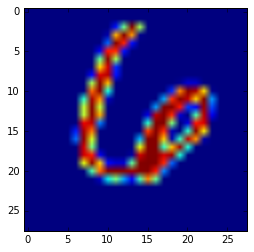

In [16]:
plt.imshow(train_x[1].reshape(28, 28))
print(train_y[1])

In [ ]:
train_y_probs = np.zeros((1000, 10))
for i in range(1000):
    train_y_probs[i][int(train_y[i])] = 1.0

In [ ]:
class NeuralNetwork:
    
    def __init__(self):
        self.weights = np.random.randn(784,10)
        self.biases = np.random.randn(10)
    
    def softmax(self, x):
        e_x = np.exp(x - np.max(x))
        out = e_x / e_x.sum()
        return out

    def fit(self, train_x, train_y):        
        for it in range(300):
            if it % 100 == 0:
                print "Epoch", it

            for i in range(1000):
                # Forward propagation
                input_layer = train_x[i]
                hidden_layer = np.dot(input_layer, self.weights) + self.biases
                output_layer = self.softmax(hidden_layer)

                # Back propagation
                
                grad = output_layer - train_y[i]

                w_grad_hid = np.dot(input_layer.reshape(784,1), grad.reshape(1,10))
                b_grad_hid = w_grad_hid.sum(axis=0)

                self.weights -= w_grad_hid
                self.biases -= b_grad_hid
        
        return self

    def predict(self, test_x):
        preds = np.zeros(100)
        for i in range(100):
            pred = self.softmax(np.dot(test_x[i], self.weights) + self.biases)
            preds[i] = np.argmax(pred)
        return preds
    
    def visualize(self):
        for i in range(10):
            plt.subplot(1, 10, i+1)
            plt.axis('off')
            plt.set_cmap('gray')
            plt.imshow(model.weights[:,i].reshape(28, 28))

In [ ]:
model = NeuralNetwork()
train_and_test(model, train_x, train_y_probs, test_x, test_y)

In [ ]:
model.visualize()

## Practical Considerations

### Deep vs Shalow Neural Networks

Decisions regarding the architecture of a neural netowk are some of the most important design decisions involved in using Neural Nets in practice. **Shallow Neural Networks**, with less than 3 layers, can actually aproximate anything, but **Deep Neural Networks** are more flexable, and can aproximate complex relationships on smaller data sets. *However:* the deeper the network, the more susceptible it is to overfitting.

### Preventing Overfitting

Neural Networks are *highly* suceptable to over-fitting. Given the computational cost of training a nerual network, its important to make sure that they are generalizable to unseen data. This means we need ways to counter over fitting. 

**Dropout** is the practice of training the neural network on various sets of data and, each time, setting some of the neuron weights to 0. This is analogous to the feature selection process seen in random forests.

**Chosing a learning rate** Remember, the neural network uses stochastic gradient descent. Setting $\eta$ too large will result in the algorithm never converging, setting $\eta$ too small will make the algorithm take too long. This means that we need to chose $\eta$, the learning rate. setting it
$$
\eta = \frac k*{1}{n-1}
$$
will let $\eta$ decay. Setting it as such will force the algorithm to converge. 

**Weight Initializations** The weights should be set to random, small values so as to allow each node to contribute to the network. Setting the weights to 0, or in some pattern, will cause the network to be untrainable. Setting the weights too large will have the network's solution be non generalizable. 